## Title :
Early Stopping

## Description :
The goal of this exercise is to understand early stopping. Early stopping is a method of avoiding overfitting, not exactly regularizing. 

<img src="../fig/fig2.png" style="width: 500px;">

NOTE: This graph is only a sample.

## Instructions:

- Use the helper function `unregularized_model` to:
    - Generate the predictor and response data using the helper code given.
    - Build a simple neural network with 5 hidden layers with 100 neurons each and display the trace plot. This network has no regularization.
- For the same model architecture implement early stopping.
- Compile the model with MSE as the loss. Fit the model on the training data.
- Use the helper code to visualise the MSE of the train and test data with respect to the epochs.
- Predict on the entire data. 
- Use the helper code to plot the predictions along with the generated data.
- This plot will consist of the predictions of both the neural networks. The graph will look similar to the one given above.

## Hints: 

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping" target="_blank">tf.keras.callbacks.EarlyStopping()</a>
Stop training when a monitored metric has stopped improving.

<img src="../fig/fig3.png" style="width: 500px;">

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Sequential" target="_blank">tf.keras.sequential()</a>
A sequential model is for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers" target="_blank">tf.keras.optimizers()</a>
An optimizer is one of the two arguments required for compiling a Keras model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense" target="_blank">model.add()</a>
Adds layers to the model.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile" target="_blank">model.compile()</a>
Compiles the layers defined into a neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.fit()</a>
Fits the data to the neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.predict()</a>
Used to predict the values given the model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History" target="_blank">history()</a>
The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [56]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from helper2 import unregularized_model
%matplotlib inline

## Implement an unregularized NN 

1/1 [==============================] - 0s 13ms/step


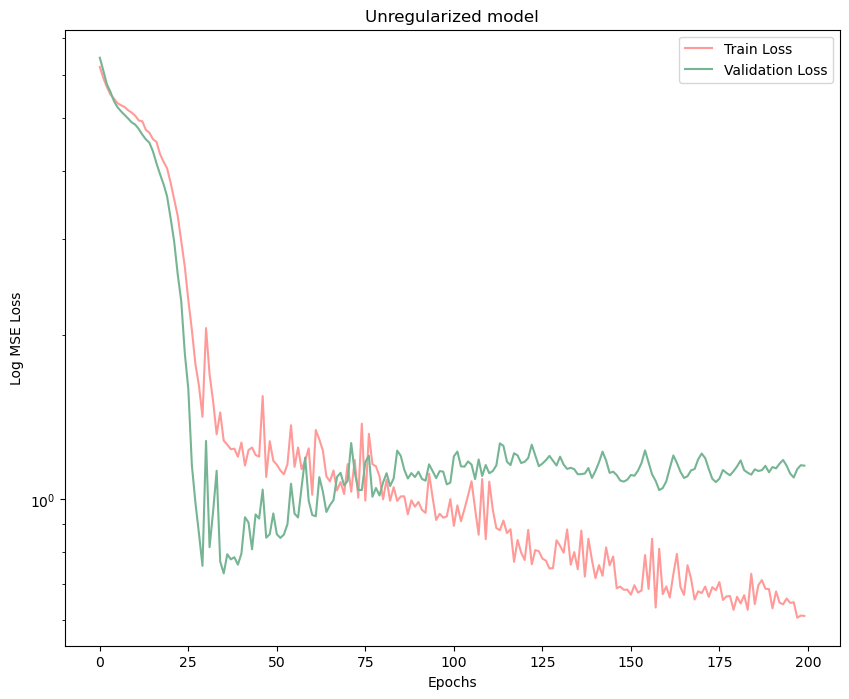

In [57]:
# Call the helper function to get the unregularized model along with the data
x_b, x_train, x_test, y_train, y_test, y_pred, mse = unregularized_model()

In [46]:
# Printing the MSE of the unregularized model
print("MSE of the unregularized model is", mse)

MSE of the unregularized model is 1.098425568924807


### ⏸ Based on the trace plot, which patience value would you most likely choose?


#### A. 1
#### B. 5-10
#### C. 45-50
#### D. 50-75

In [47]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'B'

## Implement previous NN with early stopping 
For early stopping we build the same network but then we implement early stopping using callbacks. 

In [58]:
x_train.shape

(20,)

In [48]:
# Building an unregularized NN with early stopping. 
# Initialise the NN, give it an appropriate name for the ease of reading
# The FCNN has 5 layers, each with 100 nodes
model_2 = models.Sequential(name='EarlyStopping')

# Add 5 hidden layers with 100 neurons each 
# tanh is the activation for the first layer
# relu is the activation for all other layers
model_2.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))

# Add the output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_2.summary()

Model: "EarlyStopping"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               200       
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40701 (158.99 KB)
Trainable params: 407

In [49]:
# Use the keras early stopping callback with the patience value of your choosing 
# while monitoring the val_loss
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    verbose=1,
)


# Compile the model with MSE as loss 
# and Adam optimizer with learning rate as 0.001
model_2.compile(loss = "mean_squared_error", optimizer = optimizers.Adam(learning_rate = 0.001))

# Save the history about the model after fitting on the train data
# Use 0.2 validation split with 1500 epochs and batch size of 10
# Use the callback for early stopping here
history_2 = model_2.fit(x_train, y_train, batch_size=10, epochs=1500, callbacks = callback, validation_split = 0.2)


Epoch 1/1500
2/2 [==============================] - 1s 82ms/step - loss: 6.6024 - val_loss: 3.4824
Epoch 2/1500
2/2 [==============================] - 0s 15ms/step - loss: 6.3994 - val_loss: 3.6702
Epoch 3/1500
2/2 [==============================] - 0s 15ms/step - loss: 6.1349 - val_loss: 3.7904
Epoch 4/1500
2/2 [==============================] - 0s 15ms/step - loss: 5.9783 - val_loss: 4.0726
Epoch 5/1500
2/2 [==============================] - 0s 15ms/step - loss: 5.7994 - val_loss: 4.4442
Epoch 6/1500
2/2 [==============================] - 0s 16ms/step - loss: 5.5572 - val_loss: 4.8851
Epoch 7/1500
2/2 [==============================] - 0s 18ms/step - loss: 5.5063 - val_loss: 5.4409
Epoch 8/1500
2/2 [==============================] - 0s 18ms/step - loss: 5.3789 - val_loss: 5.6491
Epoch 9/1500
2/2 [==============================] - 0s 18ms/step - loss: 5.3231 - val_loss: 5.9235
Epoch 10/1500
2/2 [==============================] - 0s 22ms/step - loss: 5.4862 - val_loss: 6.1311
Epoch 11/

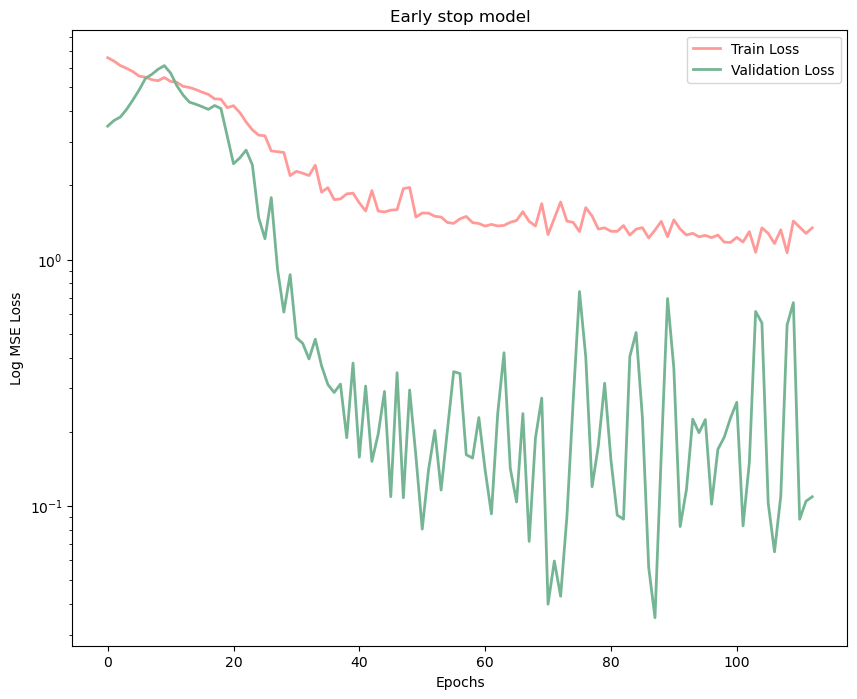

In [50]:
# Helper code to plot the data
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

In [51]:
### edTest(test_mse) ###
# Use the early stop implemented model above to predict for 
# x_b (used exclusively for plotting)
y_early_stop_pred = model_2.predict(x_b)

# Use the model above to predict on the test data
y_earl_stop_pred_test = model_2.predict(x_test)

# Compute the test MSE by predicting on the test data
mse_es = mean_squared_error(y_test, y_earl_stop_pred_test)

1/1 [==============================] - 0s 14ms/step


In [52]:
# Print the MSE of the early stopped model
print("MSE of the early stopping regularized model is", mse_es)

MSE of the early stopping regularized model is 1.015832126307804


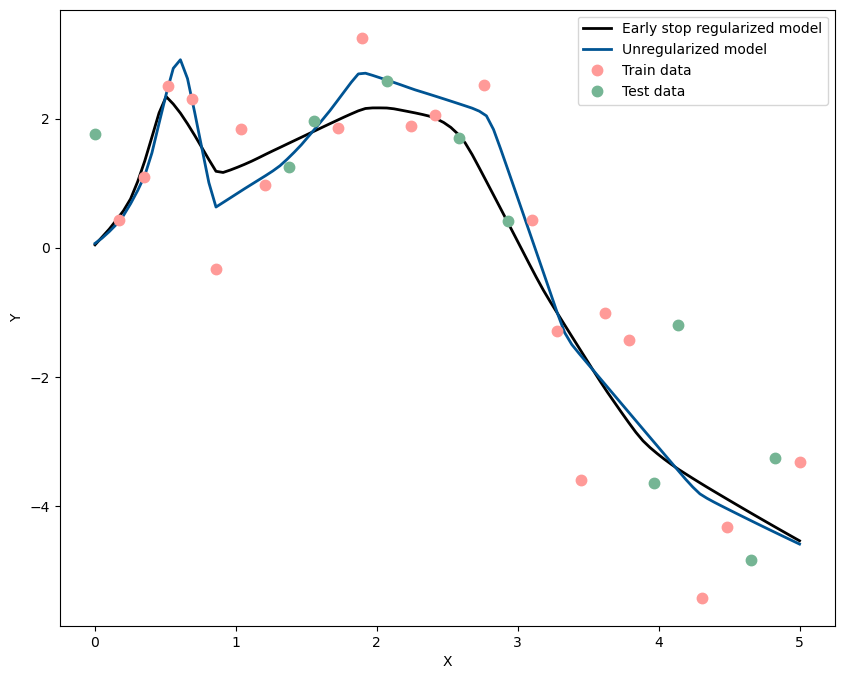

In [53]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_early_stop_pred, label='Early stop regularized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### ⏸ **After marking, change the patience parameter once to 2 and once to 100 in the early stopping callback with the same data. Do you notice any change? Which value is more efficient?**

In [54]:
### edTest(test_chow2) ###
# Type your answer within in the quotes given

answer2 = '___'